<a href="https://www.kaggle.com/code/alaaelnakeeb/employee-attrition?scriptVersionId=156184850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# # Problem:
we need to define the reasons for employees satisfaction and attrition(employees leave the company for whatever reason, either they've found a new job or retired, and haven't been replaced immediately) from the company.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler

# * Data Understanding*

In [2]:
df=pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv",sep=",",encoding="utf-8")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.duplicated().sum()

0

In [6]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing percentages
missing_data = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Sort the DataFrame by missing percentage in descending order
missing_data.sort_values(by='MissingPercentage', ascending=False)

,Column,MissingPercentage
0,Age,0.0
26,StandardHours,0.0
20,NumCompaniesWorked,0.0
21,Over18,0.0
22,OverTime,0.0
23,PercentSalaryHike,0.0
24,PerformanceRating,0.0
25,RelationshipSatisfaction,0.0
27,StockOptionLevel,0.0
18,MonthlyIncome,0.0


- Attrition is our target value which has no missing value.
- It's very good that we are having a complete dataset, there is no any missing values in dataset.

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Exclude features with only one value for EmployeeCount, Over18, and StandardHours.**

In [8]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


Age Distribution: The average age of employees is approximately 37 years, with the majority falling between the range of 30 to 43 years. The youngest employee is 18 years old, while the oldest is 60 years.

Hourly Rate: The average hourly rate for employees is around 66, with a minimum rate of 30 and a maximum rate of 100.

Distance From Home: Employees have an average distance of approximately 9 miles from home to work, with a wide range of distances.

Education Level: Employees' education levels range from 1 to 5, with an average education level of around 3, indicating a mix of educational backgrounds.

Monthly Income: The average monthly income is about 6503, with the majority earning between 2911 and 8379. The maximum income is 19999.

Years at Company: Employees have an average tenure of around 7 years, with some individuals having up to 40 years of experience at the company.

Environment Satisfaction: On average, employees are moderately satisfied with their work environment, with satisfaction levels ranging from 1 (Low) to 4 (Very High).

Job Satisfaction: Employees' job satisfaction levels vary, with an average rating of around 3, reflecting a mix of satisfaction levels.

Work-Life Balance: Employees perceive their work-life balance as better on average, with satisfaction levels ranging from 1 (Bad) to 4 (Best).

Total Working Years: The average total working years is approximately 11, indicating a diverse range of experience levels among employees

In [11]:
data=df.copy()

In [12]:
# Unencoding Categorical Features
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df['Education']:
    df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df[col]:
    df[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)
# Checking new values for decoded attributes 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2


# Count values for object

In [13]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [15]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [16]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [18]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [19]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

# Correlation Matrix

<Axes: >

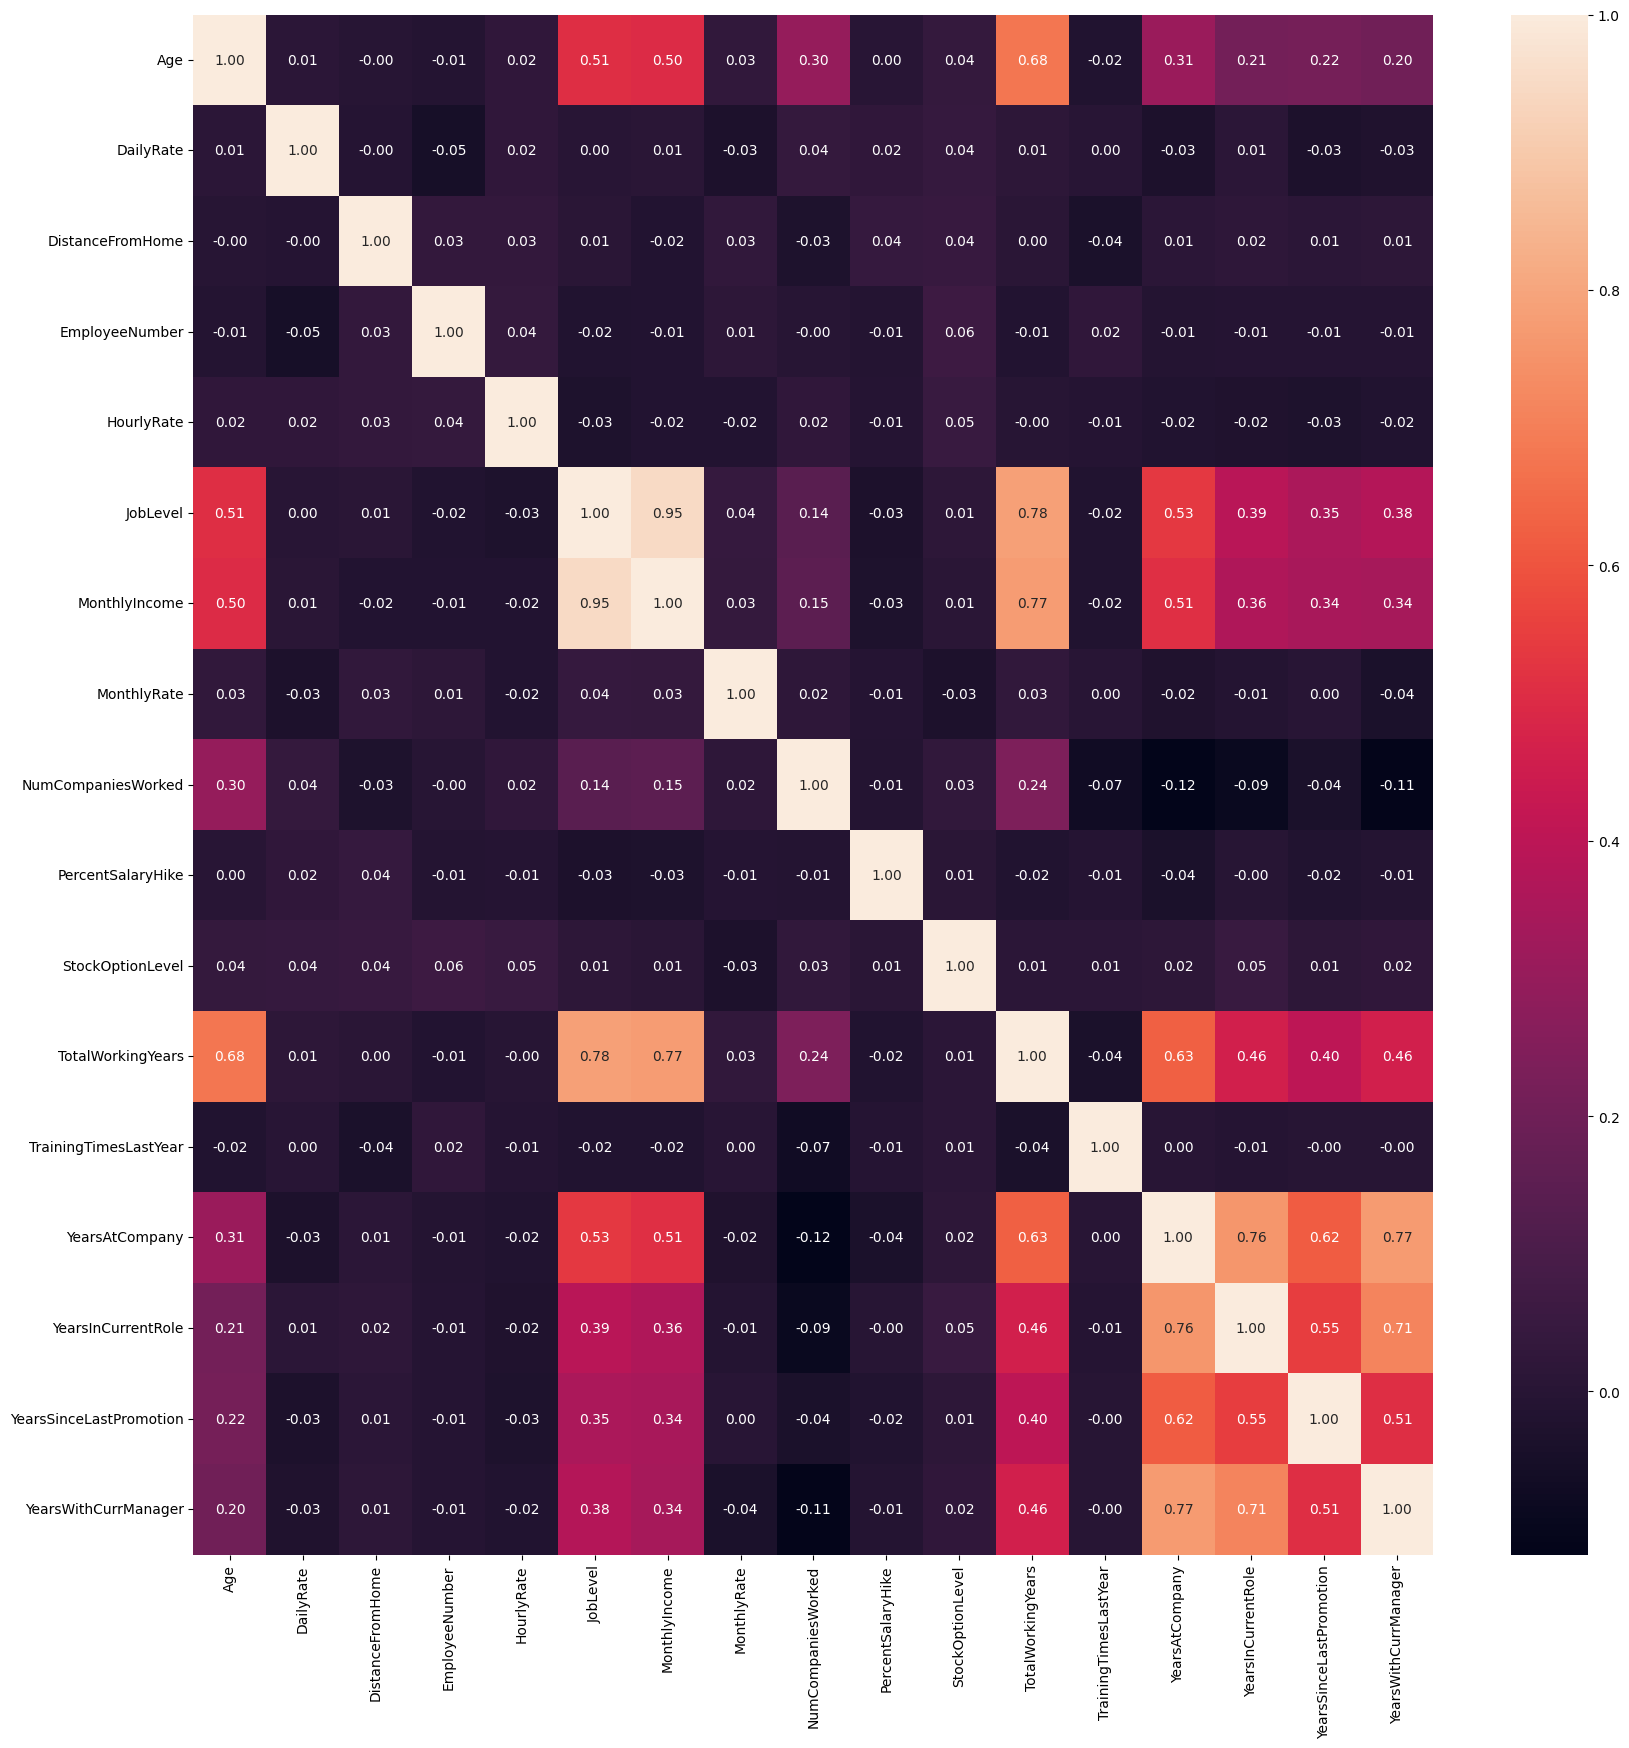

In [20]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')


*The relation between features and target is kind a weak.*

# Answer Business Questions :

# 1. How Is Attrition Affected by Gender?

In [21]:
G_A=df.groupby(['Gender'])[['Attrition']].value_counts().reset_index()
G_A

,Gender,Attrition,count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


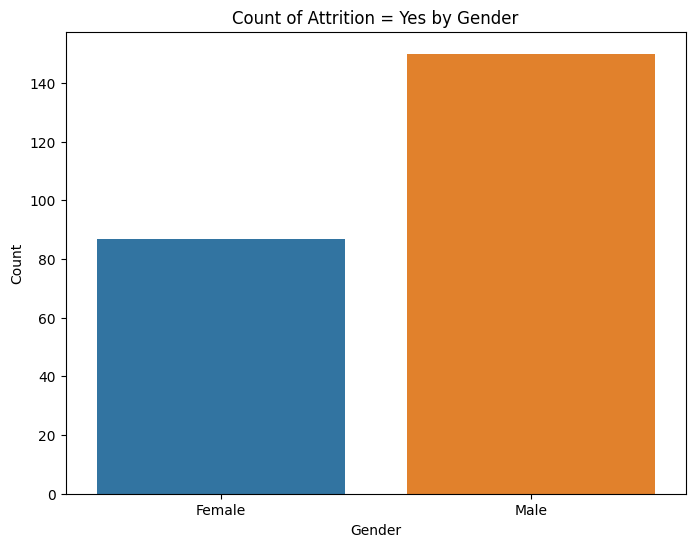

In [22]:
yes_attrition = G_A[G_A['Attrition'] == 'Yes']

plt.figure(figsize=(8, 6))
sns.barplot(data=yes_attrition, x='Gender', y='count')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

num of male still greater than num of female

# 2. How Is Attrition Affected by business travels?

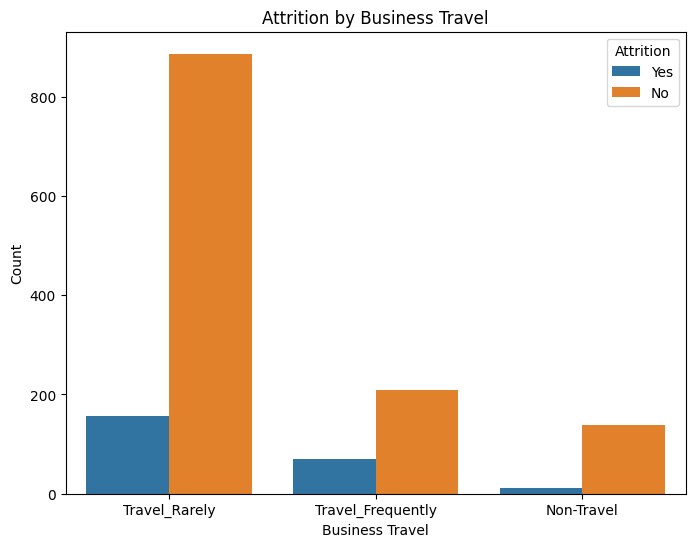

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# 3. what is effect of the distance from home on attrition ?

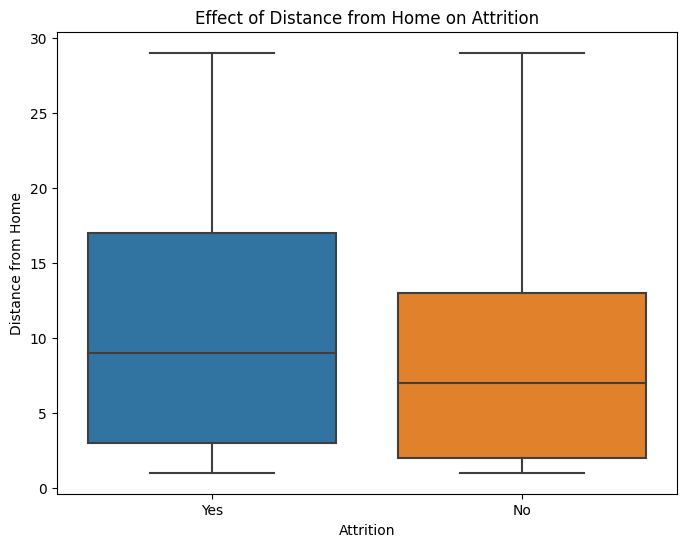

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Effect of Distance from Home on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

# 4. What is the most Department of attritions ?

In [25]:
# Filter the DataFrame for employees with attrition
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attritions per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attritions
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()

print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")


The department with the most attritions is 'Research & Development' with 133 attritions.


# 5. What is the most job role of attritions ?

In [26]:
# Calculate the count of attritions per job role
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attritions
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()

print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")


The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


In [27]:
fig = px.histogram(attrition_data, x = attrition_data['JobRole'])
fig.show()

# 6-what is effect of age on attrition ?

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

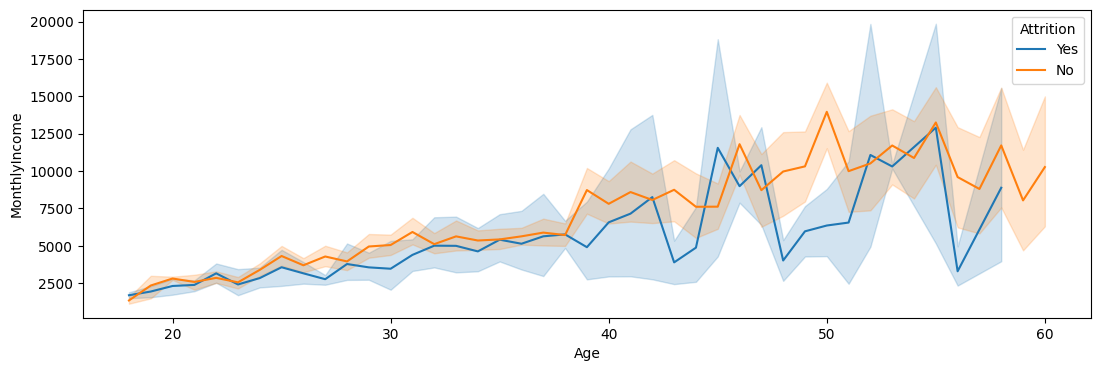

In [28]:
plt.figure(figsize=(13,4))
sns.lineplot(data=df,x='Age',y='MonthlyIncome',hue="Attrition")

In [29]:
data['Age'].max()

60

In [30]:
data['Age'].min()

18

In [31]:
interval = pd.interval_range(start= 18 , freq = 10 , end = 68)
data['Age_Interval'] = pd.cut(data['Age'] , bins = interval , labels= [])

In [32]:
da=data.groupby(['Attrition'])[['Age_Interval']].value_counts().reset_index()
da.set_axis(['Attrition','Age_interval','Count'],axis='columns')
da

,Attrition,Age_Interval,count
0,No,"(28, 38]",547
1,No,"(38, 48]",329
2,No,"(18, 28]",181
3,No,"(48, 58]",157
4,No,"(58, 68]",15
5,Yes,"(28, 38]",101
6,Yes,"(18, 28]",69
7,Yes,"(38, 48]",38
8,Yes,"(48, 58]",25
9,Yes,"(58, 68]",0


Text(0.5, 1.0, 'Ratio of Age and Attrition')

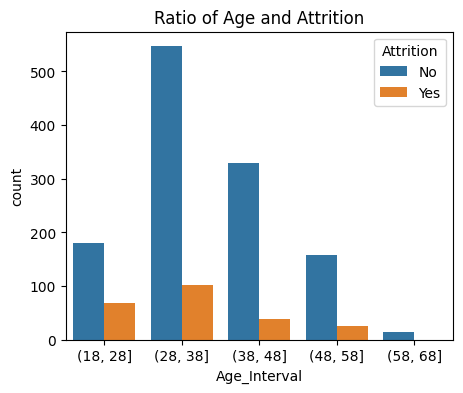

In [33]:
plt.figure(figsize=(5,4))
sns.barplot(data=da,x='Age_Interval',y='count',hue="Attrition")
plt.title("Ratio of Age and Attrition")

nterval of (18,28] has big ratio of employees that left compare that employeess staying 

# 7- Is salary is one of the main reasons?

/tmp/ipykernel_19/4259610077.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='MonthlyIncome', ylabel='Density'>

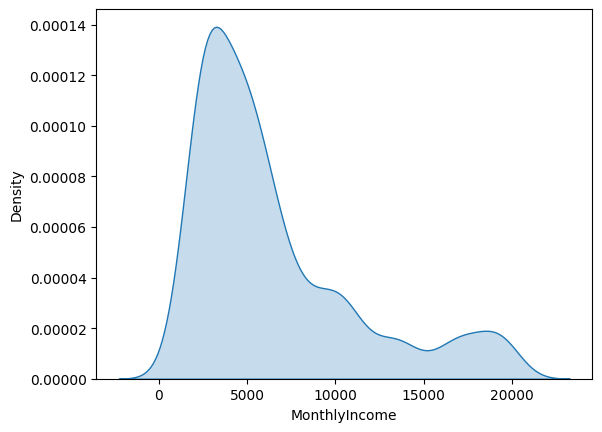

In [34]:
sns.kdeplot(data=data,x="MonthlyIncome",shade=True)

<Axes: title={'center': 'Salary with Age'}, xlabel='MonthlyIncome', ylabel='Age'>

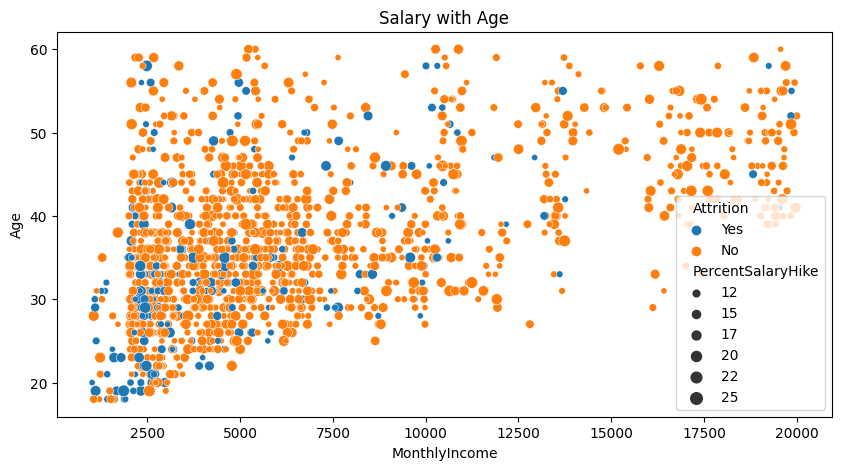

In [35]:
plt.figure(figsize=(10,5))
plt.title("Salary with Age")
sns.scatterplot(data=data,x="MonthlyIncome",y="Age",hue="Attrition", size="PercentSalaryHike",sizes=(20, 70))

# 8.How much does income matter?

Text(0.5, 1.0, 'Ratio between Income and HourlyRate')

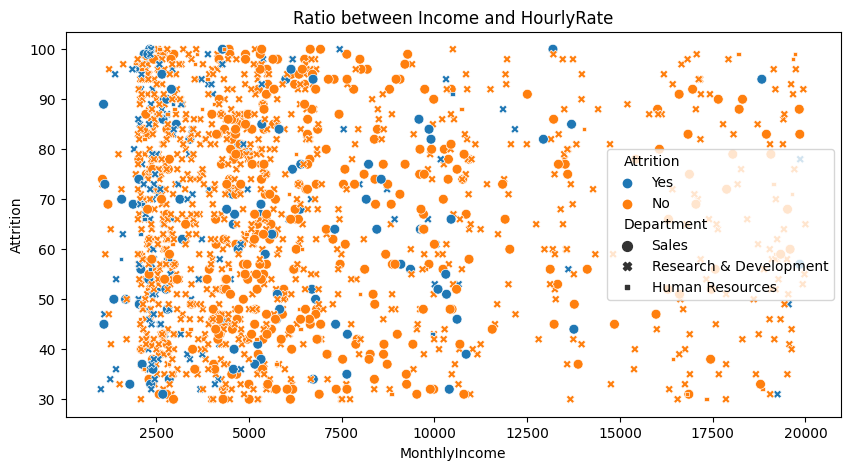

In [36]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data,x='MonthlyIncome',y='HourlyRate',hue="Attrition",style="Department",size="Department",sizes=(20,50))
plt.ylabel('Attrition')
plt.xlabel('MonthlyIncome')
plt.title("Ratio between Income and HourlyRate")

 most employees have Monthly rate 1000 to 7500 left jobs anf alot of them at sales and research & devlopment department so may be income effect on attrition.

# 9-Which Education Field is more likely to leave?

In [37]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

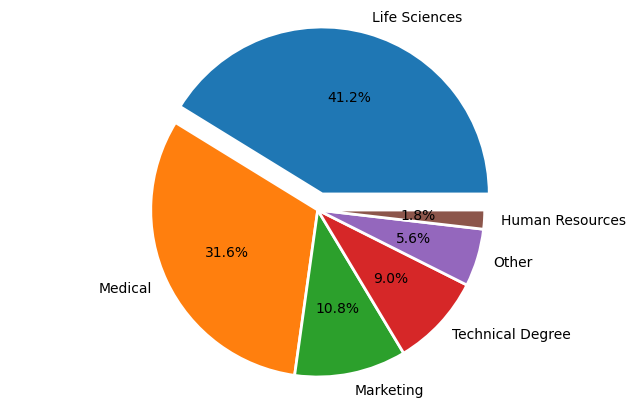

In [38]:
plt.figure(figsize = (8,5))
explode = (0.1,0,0,0,0,0)
label=['Life Sciences',"Medical","Marketing","Technical Degree","Other","Human Resources"]
plt.pie(data['EducationField'].value_counts(), explode = explode, labels = label,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "w",'linewidth' : 2})
plt.axis('equal') 
plt.show()

In [39]:
da4=data.groupby(['EducationField'])[['Attrition']].value_counts().reset_index()
da4.set_axis(['EducationField','Attrition','Count'],axis='columns')
da4

,EducationField,Attrition,count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


<Axes: xlabel='count', ylabel='EducationField'>

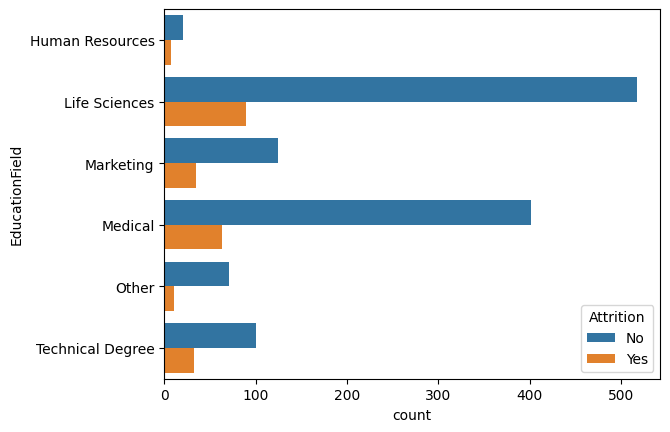

In [40]:
sns.barplot(data=da4,x="count",y="EducationField",hue="Attrition")

Field of Life Science is bigest field ,where employees work in it and has heigher number from left employees.

# 10.Do Education Field play a role?

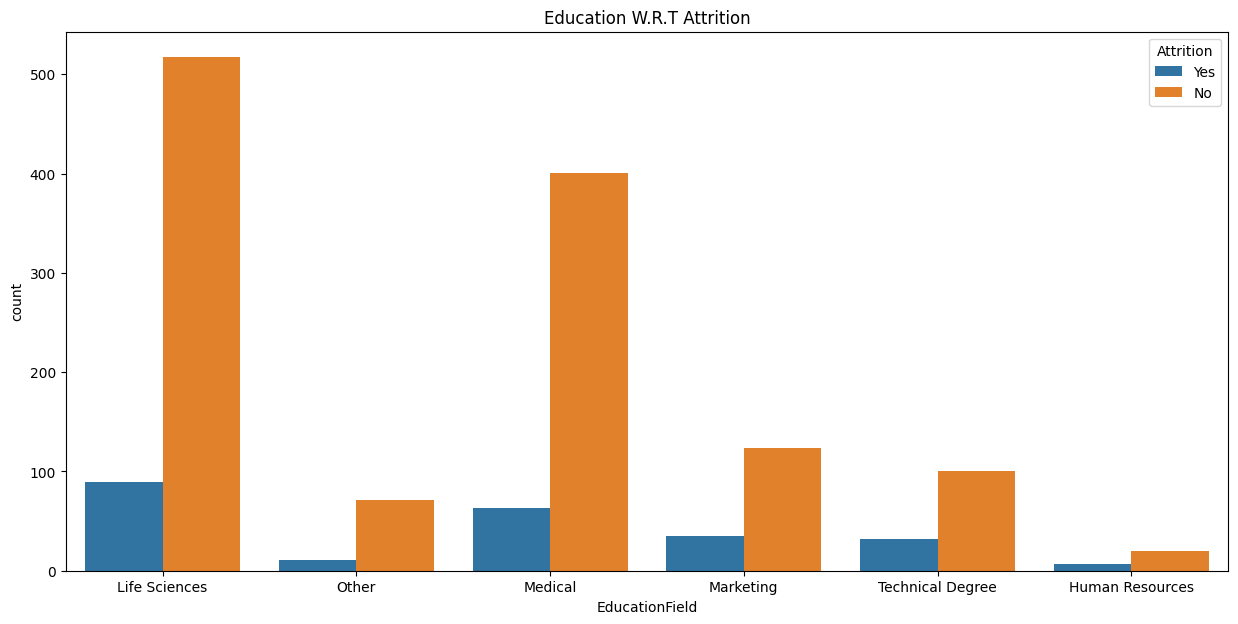

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['EducationField'], hue='Attrition', data=df)
plt.title("Education W.R.T Attrition")
plt.show()

# 11.Do overtime stresses employees and makes them have to leave?

In [42]:
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()
sizes = overtime_counts.values
labels = overtime_counts.index
labels = [labels[2][1], labels[3][1]]
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [43]:
import plotly.graph_objects as go
labels = ['Overtime', 'No Overtime']
values = [289, 127]

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.5))
fig.update_layout(title='Overtime X Attrition', autosize=False, width=500, height=450)
fig.show()


# 12.How does Work Life Balance impact the overall attrition rates?

In [44]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts().to_frame()


count
WorkLifeBalance Attrition       
Bad             No            55
                Yes           25
Best            No           126
                Yes           27
Better          No           766
                Yes          127
Good            No           286
                Yes           58

This implies that a better work-life balance might contribute to employee retention.